In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools

clang: warning: libstdc++ is deprecated; move to libc++ with a minimum deployment target of OS X 10.9 [-Wdeprecated]
ld: library not found for -lstdc++
clang: error: linker command failed with exit code 1 (use -v to see invocation)
WARNING    Cannot use Cython, a test compilation failed: command 'g++' failed with exit status 1 (LinkError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


nr of spikes: 0


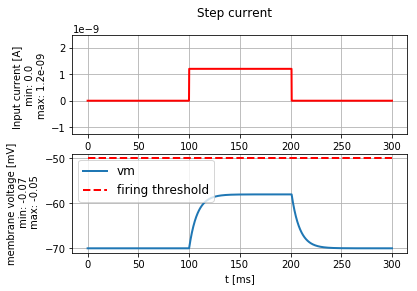

nr of spikes: 5


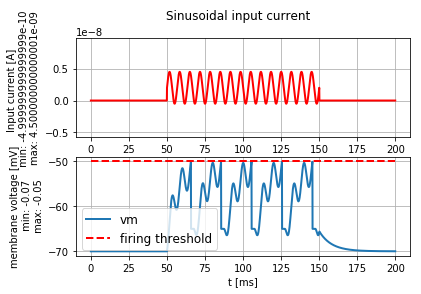

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [2]:
LIF.getting_started()
LIF.print_default_parameters()

2.1.1
- need 20mV of change in membrane potential, and membrane resistance is 10MOhms, so you need I = 20mV/10MOhms

In [3]:
20.0*b2.mV/LIF.MEMBRANE_RESISTANCE

2. * namp

nr of spikes: 0


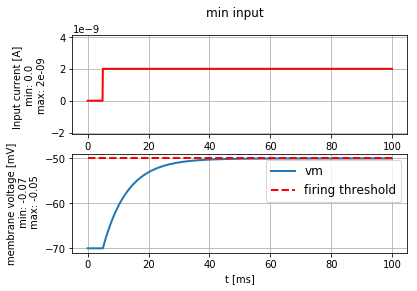

In [4]:
# 2.1.2
step_current = input_factory.get_step_current(t_start=5, t_end=100, unit_time=b2.ms, amplitude=2.*b2.nA)
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [5]:
LIF.simulate_LIF_neuron??

In [26]:
# 2.2.1
currents = np.arange(1.9,5,0.1)
fr = np.zeros_like(currents)
for i_c, c in enumerate(currents):
    print(c, end='|')
    step_current = input_factory.get_step_current(t_start=0, t_end=500, unit_time=b2.ms, amplitude=c*b2.nA)
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms, abs_refractory_period=3.*b2.msecond)
    #plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
    fr[i_c] = spike_monitor.count[0]

1.9|2.0|2.1|2.2|2.3000000000000003|2.4000000000000004|2.5000000000000004|2.6000000000000005|2.7000000000000006|2.8000000000000007|2.900000000000001|3.000000000000001|3.100000000000001|3.200000000000001|3.300000000000001|3.4000000000000012|3.5000000000000013|3.6000000000000014|3.7000000000000015|3.8000000000000016|3.9000000000000017|4.000000000000002|4.100000000000001|4.200000000000002|4.3000000000000025|4.400000000000002|4.500000000000002|4.600000000000002|4.700000000000003|4.8000000000000025|4.900000000000002|

Text(0,0.5,'Firing Rate')

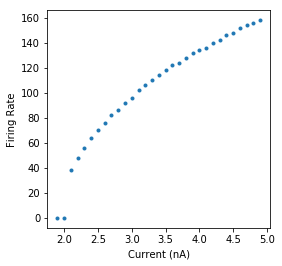

In [29]:
plt.figure(figsize=(4,4))
plt.plot(currents, fr/0.5, '.')
plt.xlabel('Current (nA)'); plt.ylabel('Firing Rate (Hz)')

Resting potential: -0.06
Reset voltage: -0.068
Firing threshold: -0.016
Membrane resistance: 9000000.0
Membrane time-scale: 0.024
Absolute refractory period: 0.002


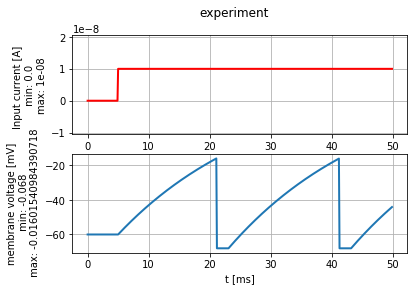

In [37]:
# 2.3.1
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=5, t_end=50, unit_time=b2.ms, amplitude= 10 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# Vr = -60mV
# print the parameters to the console and compare with your estimates
LIF.print_obfuscated_parameters(random_parameters)

In [6]:
??LIF.simulate_LIF_neuron

nr of spikes: 0


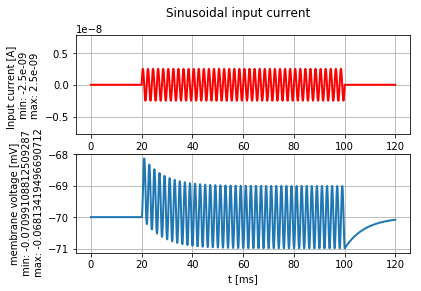

In [10]:
# 2.4.1
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=500*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

# lowpass